In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cv = CountVectorizer()

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

## Analyzing data type of each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Analyzing description

In [5]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


## Check if there are any null values

In [6]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

<AxesSubplot:>

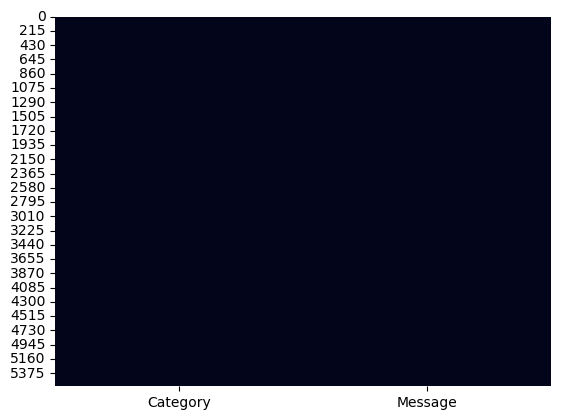

In [7]:
sns.heatmap(df.isnull(), cbar=False)

#### Dataset is clean with no null values.

## Analyzing category column values

In [8]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

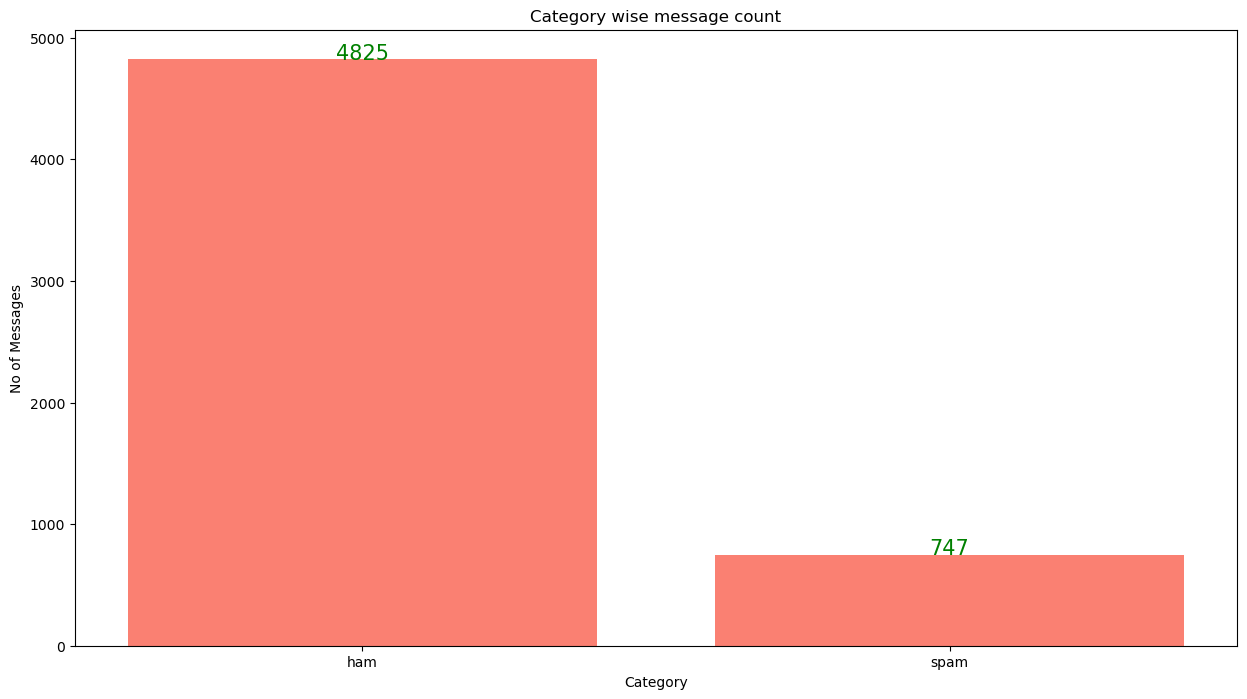

In [9]:
plt.figure(figsize=(15,8))
plt.bar(df['Category'].value_counts().index, df['Category'].value_counts().values,color="salmon")

# set the axis labels and title
plt.xlabel('Category')
plt.ylabel('No of Messages')
plt.title('Category wise message count')

# rotate the x-axis labels for better visibility
for i, v in enumerate(df['Category'].value_counts().values):
    plt.text(df['Category'].value_counts().index[i], v+0.15, str(round(v,2)), fontsize=15, color='green', ha='center')

# show the plot
plt.show()

([<matplotlib.patches.Wedge at 0x1dd0c12f248>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59%\n(4825)'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41%\n(747)')])

<Figure size 640x480 with 0 Axes>

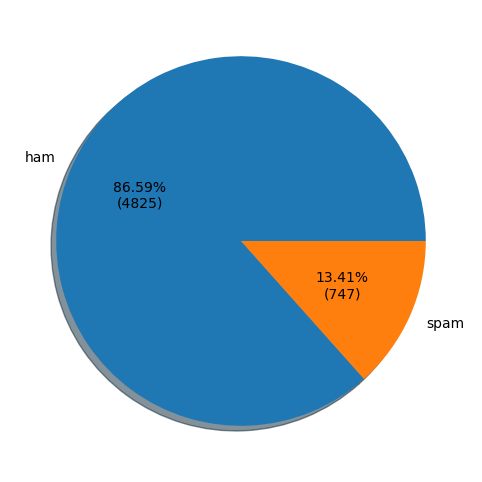

In [10]:
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

v_counts = df['Category'].value_counts()
total = len(df['Category'])
fig = plt.figure()
plt.figure(figsize=(8,6))
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=True)

#### More than 86% data belongs to ham category while 13% data is for spam category.

### Removing duplicates

In [11]:
df[df.duplicated()]['Category'].value_counts()

ham     309
spam    106
Name: Category, dtype: int64

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(5157, 2)

In [14]:
df['Category'].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

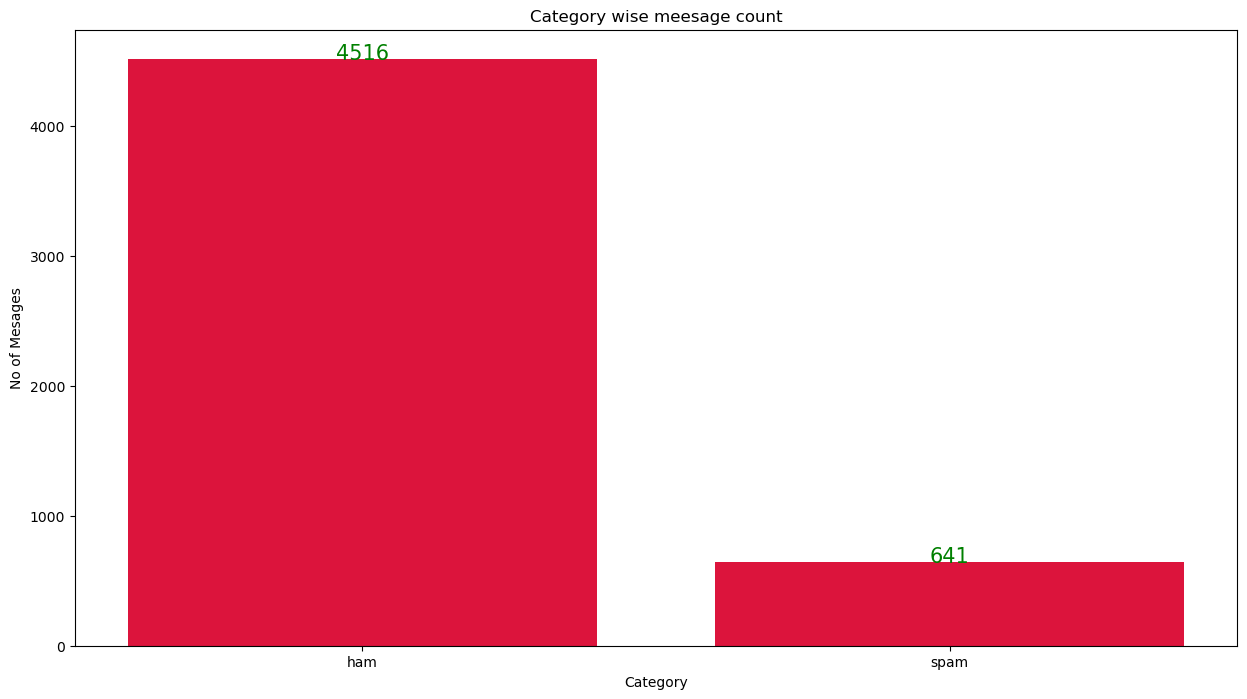

In [15]:
plt.figure(figsize=(15,8))
plt.bar(df['Category'].value_counts().index, df['Category'].value_counts().values,color="crimson")

# set the axis labels and title
plt.xlabel('Category')
plt.ylabel('No of Mesages')
plt.title('Category wise meesage count')

# rotate the x-axis labels for better visibility
for i, v in enumerate(df['Category'].value_counts().values):
    plt.text(df['Category'].value_counts().index[i], v+0.15, str(round(v,2)), fontsize=15, color='green', ha='center')

# show the plot
plt.show()

([<matplotlib.patches.Wedge at 0x1dd0c1a3648>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57%\n(4516)'),
  Text(0.5548334056198901, -0.22838540235364085, '12.43%\n(641)')])

<Figure size 640x480 with 0 Axes>

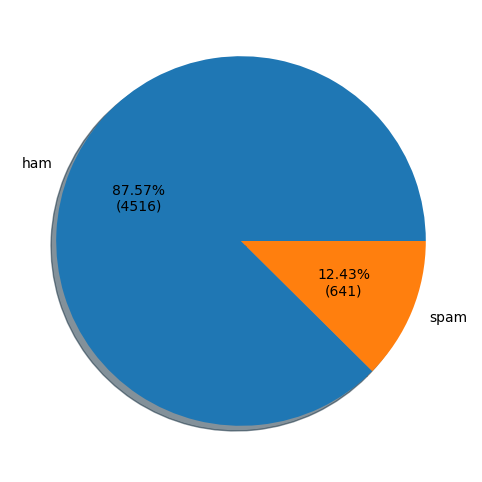

In [16]:
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

v_counts = df['Category'].value_counts()
total = len(df['Category'])
fig = plt.figure()
plt.figure(figsize=(8,6))
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=True)

#### After removing duplicates, ham category data increase to more than 87% and spam category data reduced to 12%

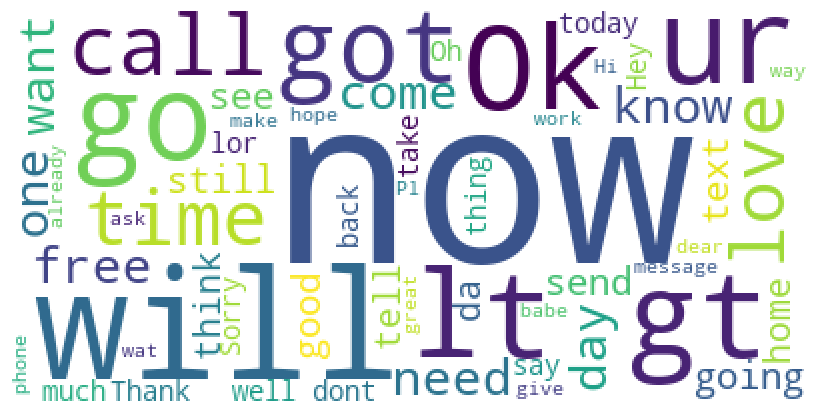

In [17]:
words = ' '.join([text for text in df['Message']])

wordcloud = WordCloud(background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [18]:
df_spam = df[df.Category == 'spam']
df_spam.shape

(641, 2)

In [19]:
df_ham = df[df.Category == 'ham']
df_ham.shape

(4516, 2)

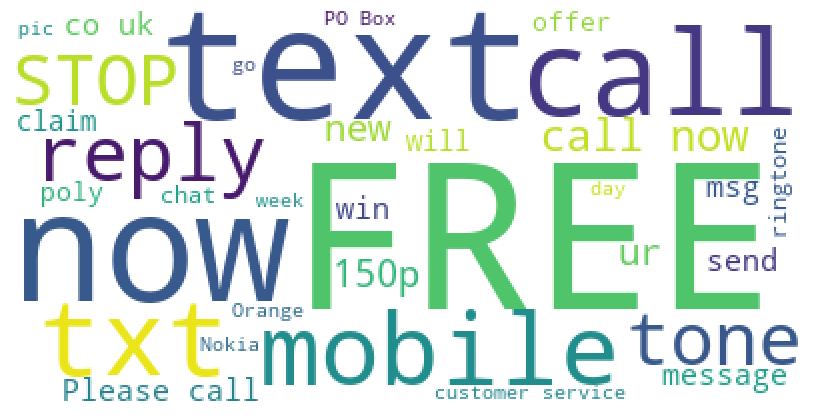

In [20]:
words = ' '.join([text for text in df_spam['Message']])

wordcloud = WordCloud(background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### We can see the most frequent keywordss from spam emails are FREE, CALL NOW, REPLY etc.  

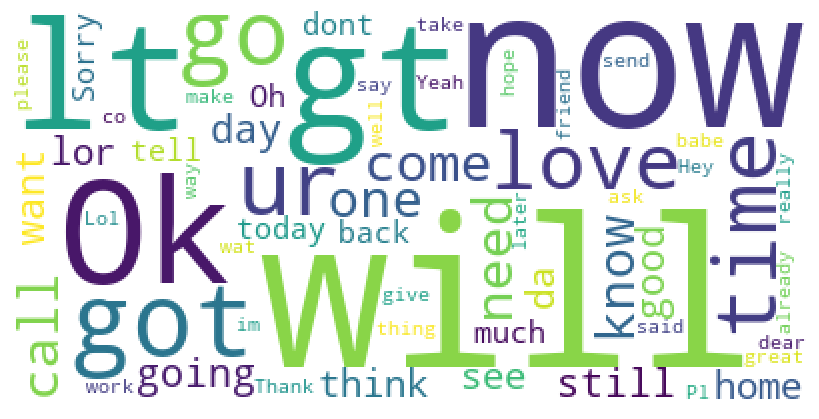

In [21]:
words = ' '.join([text for text in df_ham['Message']])

wordcloud = WordCloud(background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [22]:
df['Category'].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

#### Here we can see the two categories data is not in same ratio. So to make rows of equal length let's add sample rows in spam category.

## Adding more sample rows into spam category

In [23]:
highest_count_category = df['Category'].value_counts().idxmax()
highest_count_category

'ham'

In [24]:
target_count = df['Category'].value_counts().max()
target_count

4516

In [25]:
duplicated_rows = []
for category in df['Category'].unique():
    count = df[df['Category'] == category].shape[0]
    if count < target_count:
        diff = target_count - count
        duplicate_rows = df[df['Category'] == category].sample(n=diff, replace=True)
        duplicated_rows.append(duplicate_rows)
        
duplicated_rows

[     Category                                            Message
 751      spam  Do you realize that in about 40 years, we'll h...
 935      spam  Dear Matthew please call 09063440451 from a la...
 487      spam  FREE MESSAGE Activate your 500 FREE Text Messa...
 2420     spam  SMS SERVICES For your inclusive text credits p...
 3679     spam  Promotion Number: 8714714 - UR awarded a City ...
 ...       ...                                                ...
 455      spam  Loan for any purpose £500 - £75,000. Homeowner...
 1414     spam  Dear U've been invited to XCHAT. This is our f...
 3981     spam                                 ringtoneking 84484
 1793     spam  WIN: We have a winner! Mr. T. Foley won an iPo...
 273      spam  HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
 
 [3875 rows x 2 columns]]

In [26]:
df = pd.concat([df] + duplicated_rows)
df.shape

(9032, 2)

In [27]:
df.Category.value_counts()

spam    4516
ham     4516
Name: Category, dtype: int64

## Transforming categorical values into numeric values

In [28]:
df.Category.replace({'spam' : 0 , 'ham' : 1}, inplace=True)

In [29]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


## Applying vectorization technique

### Vectorize our message and convert it into a NumPy array

In [30]:
X = cv.fit_transform(df['Message'])
X = X.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
sorted(cv.vocabulary_.keys())

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [32]:
y = df['Category']
y.shape

(9032,)

### Split data into train and test

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
X_train.shape

(7225, 8709)

In [35]:
X_test.shape

(1807, 8709)

In [36]:
y_train.shape

(7225,)

In [37]:
y_test.shape

(1807,)

## Lets apply different classification models and calculate the accuracy score

### 1. Logistic Regression

In [38]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred1 =  reg.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred1)
accuracy

0.9944659656889873

Text(50.722222222222214, 0.5, 'Truth')

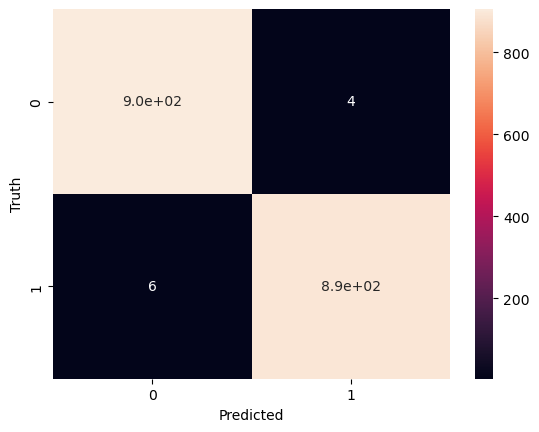

In [41]:
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       909
           1       1.00      0.99      0.99       898

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



#### The accuracy score for Logistic Regression is 0.9944659656889873.

### 2. Decision Tree

In [43]:
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred2 =  tree.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred2)
accuracy

0.9856115107913669

Text(50.722222222222214, 0.5, 'Truth')

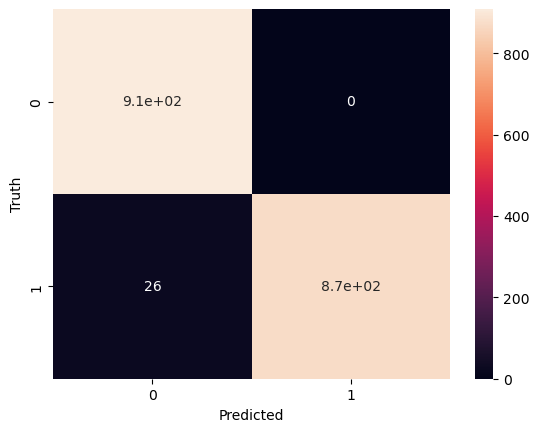

In [46]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       909
           1       1.00      0.97      0.99       898

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



#### The accuracy score for Decision Tree is 0.9856115107913669.

### 3. Support Vector Machine

In [48]:
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [49]:
y_pred3 = svm.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred3)
accuracy

0.9955727725511898

Text(50.722222222222214, 0.5, 'Truth')

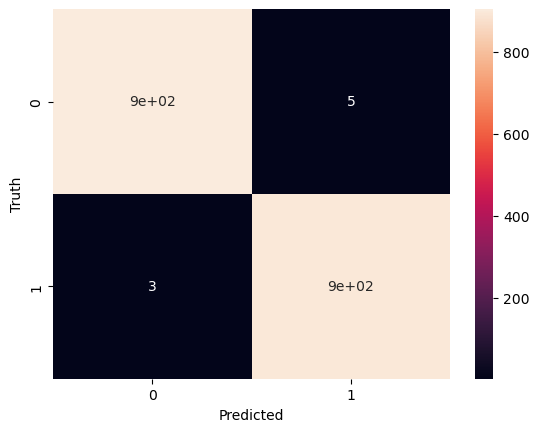

In [51]:
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       909
           1       0.99      1.00      1.00       898

    accuracy                           1.00      1807
   macro avg       1.00      1.00      1.00      1807
weighted avg       1.00      1.00      1.00      1807



#### The accuracy score for Support Vector Machine is 0.9955727725511898.

### 4. Random Forest

In [53]:
rforest = RandomForestClassifier(n_estimators=10)
rforest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [54]:
y_pred4 = rforest.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred4)
accuracy

0.9994465965688988

Text(50.722222222222214, 0.5, 'Truth')

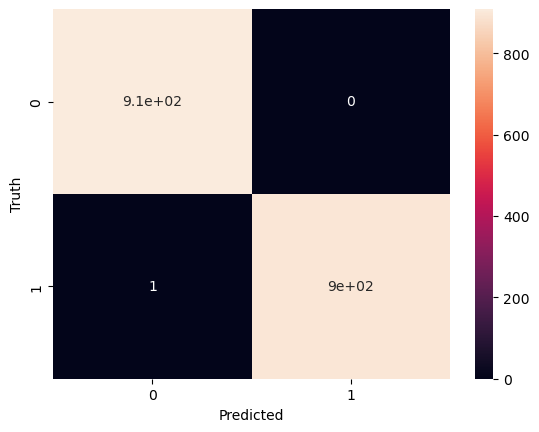

In [56]:
cm = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       909
           1       1.00      1.00      1.00       898

    accuracy                           1.00      1807
   macro avg       1.00      1.00      1.00      1807
weighted avg       1.00      1.00      1.00      1807



#### The accuracy score for Random Forest is 0.9994465965688988.

### 5. K-Nearest Neighbors

In [58]:
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [59]:
y_pred5 = knn.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred5)
accuracy

0.9994465965688988

Text(50.722222222222214, 0.5, 'Truth')

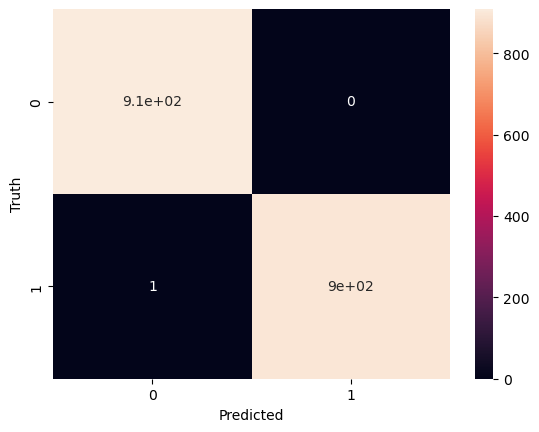

In [61]:
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       909
           1       1.00      1.00      1.00       898

    accuracy                           1.00      1807
   macro avg       1.00      1.00      1.00      1807
weighted avg       1.00      1.00      1.00      1807



#### The accuracy score for K-Nearest Neighbors is 0.9994465965688988.

### From all classification models, Random Forest and K-Nearest Neighbors performed the best.